In [ ]:
from google.colab import drive
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive', force_remount=True)      

Mounted at /content/gdrive


In [ ]:
sys.path.append('/content/gdrive/My Drive/')
import fp_utilities as fp_util
import plot_utilities as plot_util
import importlib
importlib.reload(fp_util)

<module 'fp_utilities' from '/content/gdrive/My Drive/fp_utilities.py'>

In [ ]:
# attack strength = norm of perturbation being applied = relative norm * average norm of test images
rel_norms = np.arange(0.0001, 0.001, 0.0004).tolist() + np.arange(0.001, 0.01, 0.004).tolist() + np.arange(0.01, 0.1, 0.04).tolist() + np.arange(0.1, 0.4, 0.1).tolist()

In [ ]:
atk_strengths = [rel_norm*fp_util.avg_l2_norm_imgs for rel_norm in rel_norms]

In [ ]:
from sklearn.metrics import accuracy_score
marra_accuracies = []
yu_accuracies = []

In [ ]:
# calculate accuracy of attribution at different attack strengths 
for atk_strength in atk_strengths:
  marra_preds = fp_util.get_predictions('Marra', attack_mode="adv1", attack_strength=atk_strength)
  marra_accuracies.append(accuracy_score(fp_util.ground_truth, marra_preds))
  yu_preds = fp_util.get_predictions('Yu', attack_mode="adv1", attack_strength=atk_strength)
  yu_accuracies.append(accuracy_score(fp_util.ground_truth, yu_preds))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
np.save('marra_accuracies_advattack1.npy', marra_accuracies)
np.save('yu_accuracies_advattack1.npy', yu_accuracies)

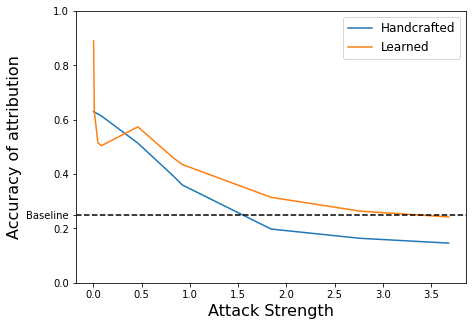

In [ ]:
import matplotlib.pyplot as plt

plot_util.plot_atk_accuracy_lines(atk_strengths, marra_accuracies, yu_accuracies)
plt.savefig('adv1-eval.pdf', bbox_inches = 'tight')


In [ ]:
atk_strengths[-1]

3.6814976562500004

In [ ]:
#get predictions to visualise as confusion matrices for further analysis
marra_preds = fp_util.get_predictions('Marra', attack_mode='adv1', attack_strength = 4)
yu_preds = fp_util.get_predictions('Yu', attack_mode='adv1', attack_strength = 4)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


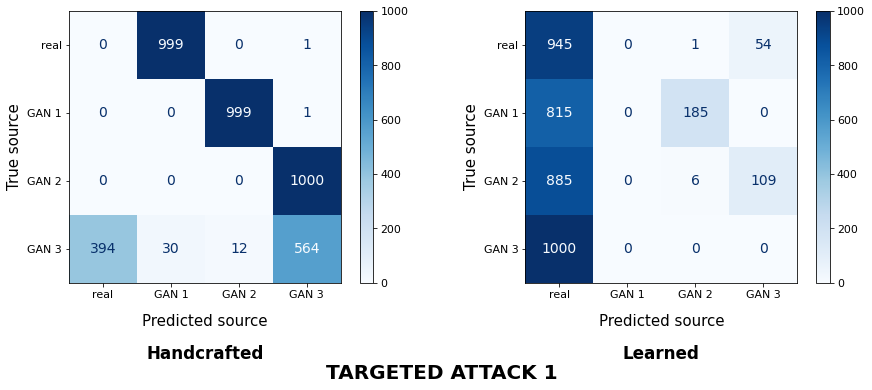

In [ ]:
plt.rcParams['font.size']=14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
  
fig, ax = plt.subplots(1,2, figsize = (15,5))

plot_util.plot_confusion_matrix('Handcrafted' , marra_preds, ax[0])
plot_util.plot_confusion_matrix('Learned', yu_preds, ax[1])

plt.suptitle('TARGETED ATTACK 1', y = -0.1, fontsize = 20, fontweight='bold')
plt.savefig('adv1-conf-matrix.pdf', bbox_inches = 'tight')


In [ ]:
#load in a test image to visualise the effect of the attack on
test_img = fp_util.load_test_images(1)[2]
atk_strengths_plot = [0, 0.4, 0.8, 1.0, 2.0,4]
atk_images = []

fps = fp_util.load_fingerprints('Yu')
for atk_strength in atk_strengths_plot:
  atk_images.append(fp_util.preprocess_adv1(test_img.reshape(1,28,28), fps, 1, atk_strength)[0].reshape(28,28))

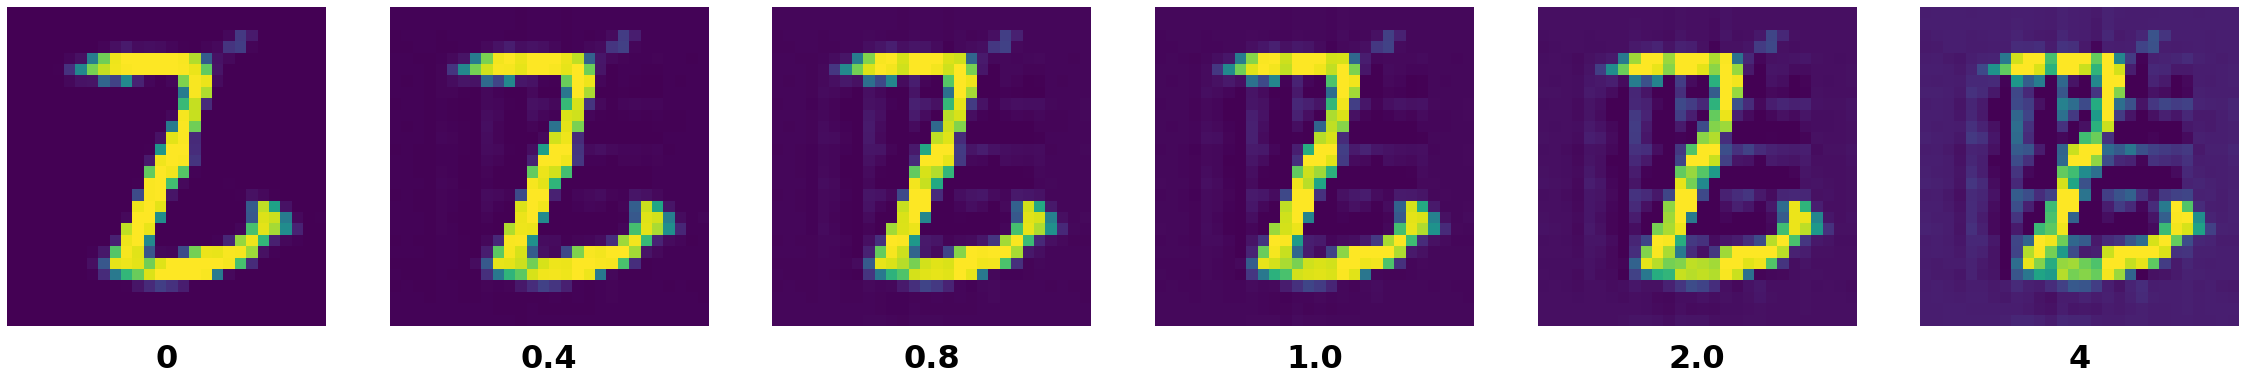

In [ ]:
plot_util.plot_atk_images(atk_images, atk_strengths_plot)
plt.savefig("adv1-images.pdf",bbox_inches='tight')